Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [21]:
library('tidymodels')




The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [22]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [23]:
glimpse(diabetes_train)



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 3, 8, 1, 13, 5, 3, 6, 10, 11, 3,…
$ Glucose                  <dbl> 85, 89, 116, 115, 126, 99, 97, 145, 109, 88, …
$ BloodPressure            <dbl> 66, 66, 74, 0, 88, 84, 66, 82, 75, 58, 92, 78…
$ SkinThickness            <dbl> 29, 23, 0, 0, 41, 0, 15, 19, 26, 11, 0, 31, 0…
$ Insulin                  <dbl> 0, 94, 0, 0, 235, 0, 140, 110, 0, 54, 0, 0, 0…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 39.3, 35.4, 23.2, 22.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 0.704, 0.388, 0.4…
$ Age                      <dbl> 31, 21, 30, 29, 27, 50, 22, 57, 60, 22, 28, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

In this case, the outcome variable is the suitable choice for outcome in a logistic regression model. 
The outcome variable indicates whether a patient has diabetes(1) or not(0), making it perfect candidate for logistic regression.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |             |
| BMI         |             |

Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test. 
BMI - Body mass index (weight in kg/(height in m)^2)

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

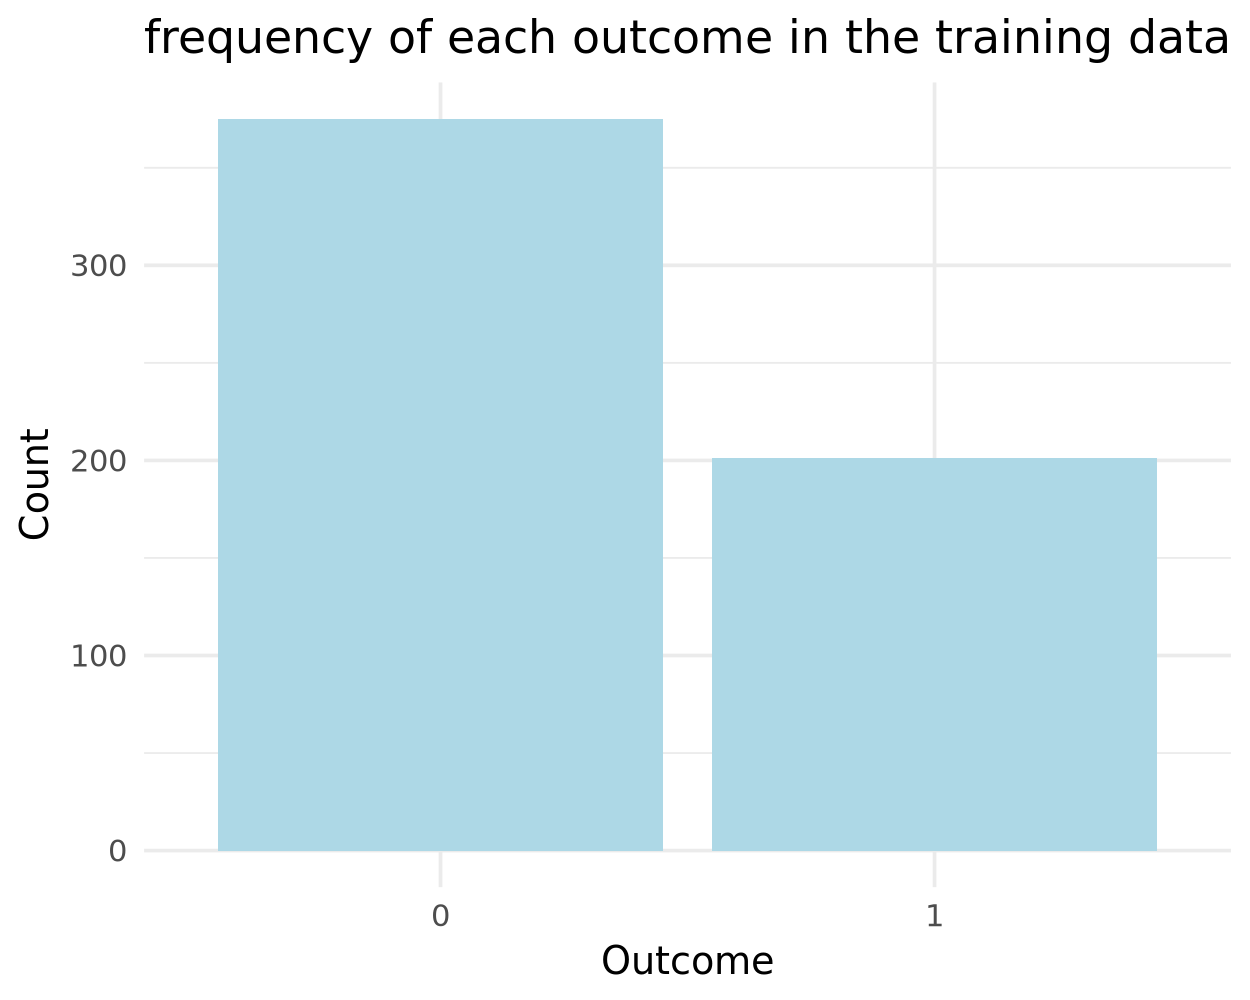

In [24]:
library('ggplot2')

ggplot(diabetes_train, aes(x = Outcome)) +
    geom_bar(fill = "lightblue") +
    labs(title = "frequency of each outcome in the training data",
         x = "Outcome",
         y = "Count") +
    theme_minimal()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

The bars of the two ourcomes are not equal so the dataset is imbalance. 



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [25]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

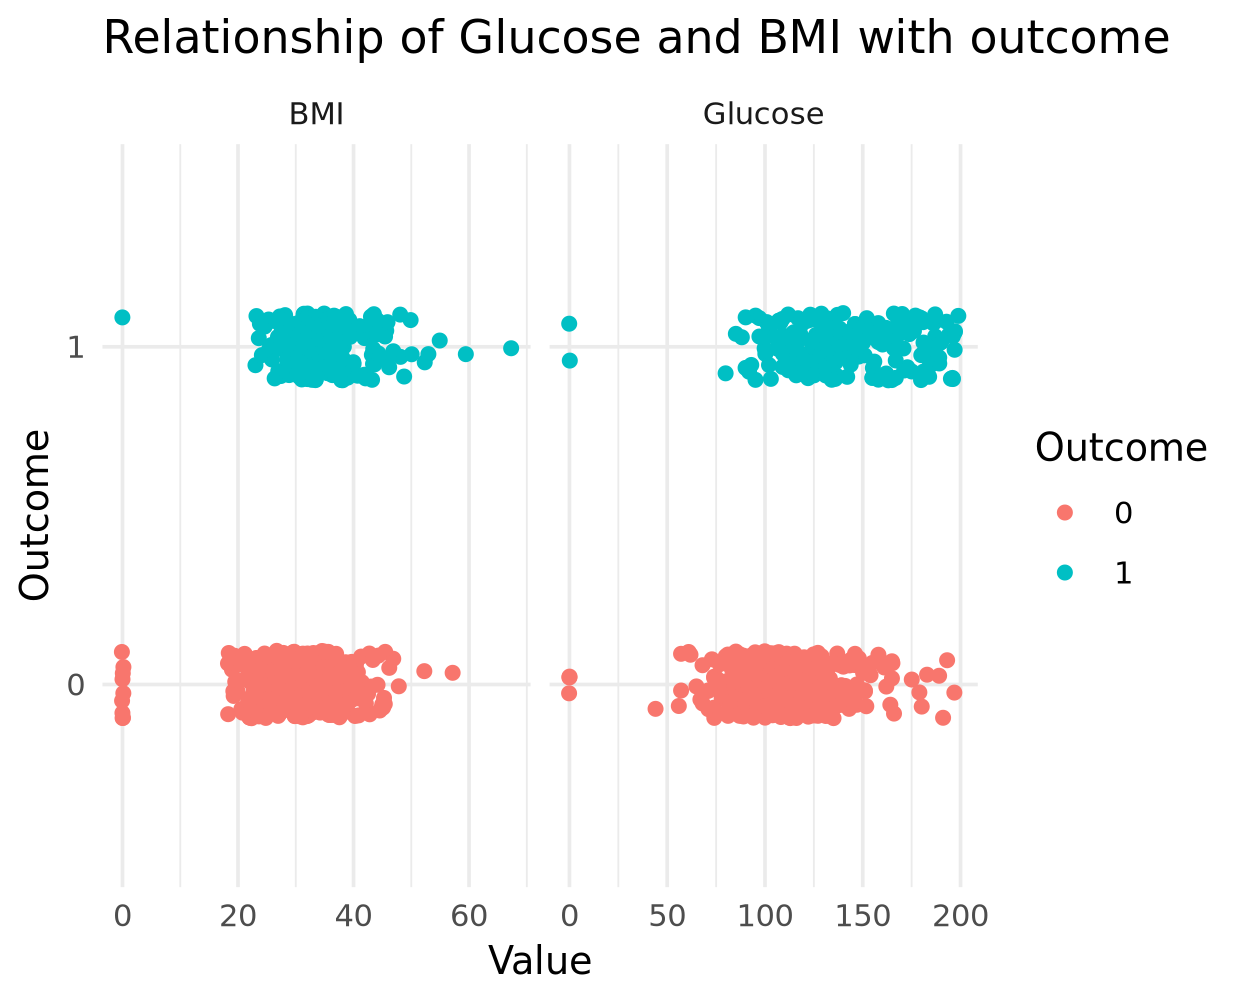

In [26]:
ggplot(plot_df, aes(x = value, y = Outcome)) +
    geom_jitter(aes(color = Outcome), height = 0.1, width = 0.2) +
    facet_wrap(~name, ncol = 2, scales = 'free_x') +
    labs(title = "Relationship of Glucose and BMI with outcome",
         x = "Value",
         y = "Outcome") +
    theme_minimal()



❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

If we remove scale = 'free_X', both the variables will be forced to use a common x-axis range, which make one plot harder to interpret because of the differing ranges between the variables. 

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [27]:
logistic_model <- logistic_reg() %>%
    set_engine("glm") %>%
    set_mode("classification")

logistic_fit <- logistic_model %>%
    fit(Outcome ~ BMI + Glucose, data = diabetes_train)

logistic_fit



parsnip model object


Call:  stats::glm(formula = Outcome ~ BMI + Glucose, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)          BMI      Glucose  
   -7.93585      0.08636      0.03586  

Degrees of Freedom: 575 Total (i.e. Null);  573 Residual
Null Deviance:	    745.1 
Residual Deviance: 563.8 	AIC: 569.8

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [28]:
diabetes_test_wPred <- augment(logistic_fit, new_data = diabetes_test)

head(diabetes_test_wPred)


.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.9214132,0.07858676,3,78,50,32,88,31.0,0.248,26,1
0,0.9693375,0.03066252,8,125,96,0,0,0.0,0.232,54,1
0,0.6779264,0.32207362,4,110,92,0,0,37.6,0.191,30,0
1,0.2026100,0.79738999,10,168,74,0,0,38.0,0.537,34,1
0,0.6482065,0.35179347,10,139,80,0,0,27.1,1.441,57,0
0,0.8531078,0.14689225,7,100,0,0,0,30.0,0.484,32,1


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [37]:
#diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

#diabetes_test_wPred |> conf_mat(Outcome, .pred_class)


diabetes_test_wPred <- augment(logistic_fit, new_data = diabetes_test)

conf_matrix <- diabetes_test_wPred %>% 
  conf_mat(Outcome, .pred_class)

print(conf_matrix)

          Truth
Prediction   0   1
         0 108  32
         1  17  35


❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

1. Number of individual who had diabetes (positive case + true positive)
    35 + 32 = 67
    
2. The number of individual who were correctly predicted to have diabeties is true positive(TP) which is 35.
3. 17 individual were predicted to have diabetes but did not have diabetes. 